In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel('btp_file.xlsx')

In [3]:
data.head()

,Time,price,volatility
0,2011-11-01,110.1,0.000000
1,2011-12-01,105.5,-4.178020
2,2012-01-01,110.6,4.834123
3,2012-02-01,117.4,6.148282
4,2012-03-01,123.7,5.366269


In [4]:
data=pd.DataFrame(data)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data.dtypes

Time          datetime64[ns]
price                float64
volatility           float64
dtype: object

In [7]:
data=data.set_index('Time')

In [8]:
data['year']=data.index.year
data['month']=data.index.month

In [9]:
import seaborn as sns

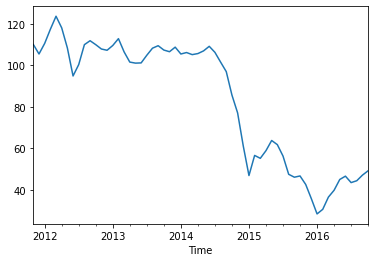

In [10]:
data['price'].plot()

In [11]:
import statsmodels.api as sm

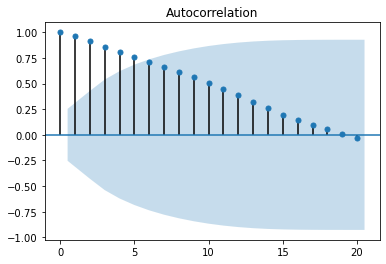

In [12]:
sm.graphics.tsa.plot_acf(data['price'].values,lags=20)
plt.show()

C:\Users\YASH\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


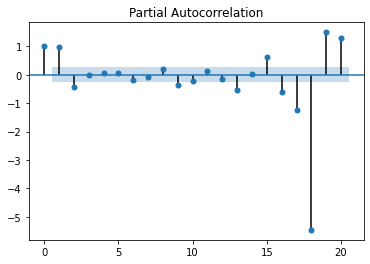

In [13]:
sm.graphics.tsa.plot_pacf(data['price'].values,lags=20)
plt.show()

# GARCH MODEL

In [14]:
vol=data['volatility'][1:]

In [15]:
vol=vol**2

In [16]:
vol.shape

(59,)

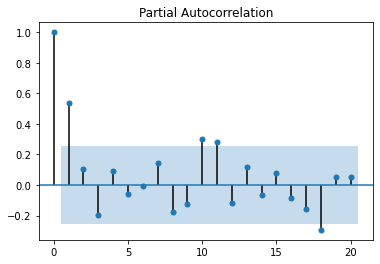

In [17]:
sm.graphics.tsa.plot_pacf(vol,lags=20)
plt.show()

In [18]:
import arch
from arch import arch_model
model = arch_model(data['volatility'][1:], p=3, q=0)



In [19]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 205.16202759560932
Iteration:      2,   Func. Count:     14,   Neg. LLF: 200.14403839372898
Iteration:      3,   Func. Count:     22,   Neg. LLF: 200.0322317858265
Iteration:      4,   Func. Count:     30,   Neg. LLF: 199.73788474500796
Iteration:      5,   Func. Count:     37,   Neg. LLF: 199.4071813407465
Iteration:      6,   Func. Count:     44,   Neg. LLF: 199.2385674252533
Iteration:      7,   Func. Count:     51,   Neg. LLF: 199.16669206398194
Iteration:      8,   Func. Count:     58,   Neg. LLF: 198.8672827236346
Iteration:      9,   Func. Count:     65,   Neg. LLF: 198.48185747400927
Iteration:     10,   Func. Count:     72,   Neg. LLF: 197.26380931139184
Iteration:     11,   Func. Count:     80,   Neg. LLF: 196.22497024395477
Iteration:     12,   Func. Count:     88,   Neg. LLF: 194.45970357005865
Iteration:     13,   Func. Count:     96,   Neg. LLF: 193.7937775142517
Iteration:     14,   Func. Count:    104,   Neg. LLF: 19

In [20]:


model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:             volatility   R-squared:                      -0.016
Mean Model:             Constant Mean   Adj. R-squared:                 -0.016
Vol Model:                       ARCH   Log-Likelihood:               -190.956
Distribution:                  Normal   AIC:                           391.911
Method:            Maximum Likelihood   BIC:                           402.299
                                        No. Observations:                   59
Date:                Fri, Dec 04 2020   Df Residuals:                       54
Time:                        13:39:27   Df Model:                            5
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0964      0.349      0.276      0.782 [ -0.587,  0.780]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          3.1925      1.871      1.707  8.787e-02    [ -0.474,  6.859]
alpha[1]       0.7688      0.197      3.911  9.192e-05    [  0.384,  1.154]
alpha[2]       0.1388      0.101      1.368      0.171 [-6.002e-02,  0.338]
alpha[3]       0.0924  4.889e-02      1.890  5.872e-02 [-3.408e-03,  0.188]
===========================================================================

Covariance estimator: robust
"""

In [21]:
predictions = model_fit.forecast(horizon=59)



In [22]:
vol=data['volatility'][1:]

In [23]:
pred_vol=np.sqrt(predictions.variance.values[-1, :])

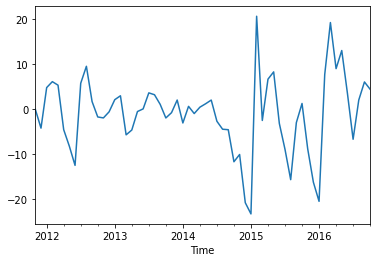

In [24]:
data['volatility'].plot()

In [25]:
pred_vol=np.array(pred_vol)

In [26]:
data['pred_vol']=0

In [27]:
data['pred_vol'][1:]=pred_vol

<ipython-input-27-b826b8b1eeae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pred_vol'][1:]=pred_vol


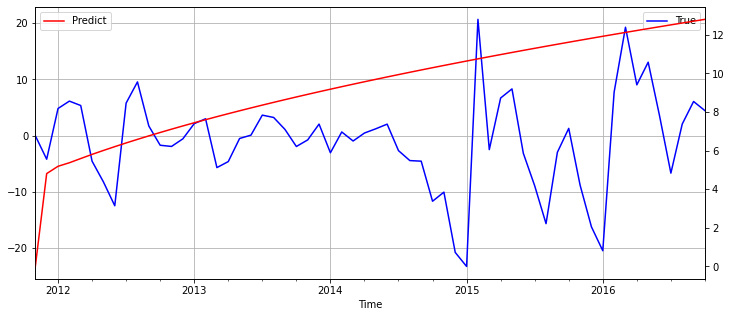

In [28]:
plt.figure(figsize=(12,5))
plt.xlabel('Data Volatility')

ax1 = data['volatility'].plot(color='blue', grid=True, label='True')
ax2 = data['pred_vol'].plot(color='red', grid=True, secondary_y=True, label='Predict')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [29]:
from sklearn.metrics import mean_squared_error

In [87]:
np.sqrt(mean_squared_error(data['volatility'],data['pred_vol']))

13.544061514925255

# ARIMA MODEL

In [88]:
from statsmodels.tsa.arima_model import ARIMA

In [89]:
model=ARIMA(data['price'].values,order=(2,1,0))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -177.704
Method:                       css-mle   S.D. of innovations              4.905
Date:                Fri, 20 Nov 2020   AIC                            363.409
Time:                        13:47:12   BIC                            371.719
Sample:                             1   HQIC                           366.653
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0918      0.870     -1.255      0.210      -2.797       0.613
ar.L1.D.y      0.5162      0.127      4.072      0.000       0.268       0.765
ar.L2.D.y     -0.2502      0.127     -1.969      0.0

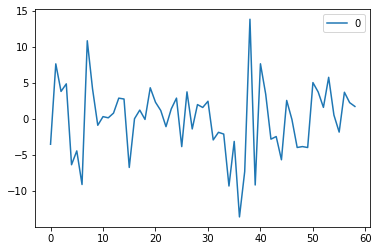

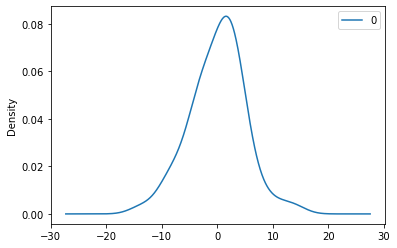

               0
count  59.000000
mean    0.035932
std     4.958427
min   -13.586809
25%    -3.012774
50%     0.542981
75%     2.887311
max    13.827817


In [90]:
model_fit=model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [111]:
pred=model_fit.predict(start=1,end=60,typ='levels')

In [112]:
pred.shape

(60,)

In [113]:
pred=np.array(pred)

In [114]:
data['arima_pred']=pred

In [115]:
data.head()

,price,volatility,year,month,pred_vol,arima_pred
Time,,,,,,
2011-11-01,110.1,0.000000,2011,11,0.000000,109.008171
2011-12-01,105.5,-4.178020,2011,12,4.811664,102.959726
2012-01-01,110.6,4.834123,2012,1,5.190632,113.582112
2012-02-01,117.4,6.148282,2012,2,5.373812,118.832528
2012-03-01,123.7,5.366269,2012,3,5.592202,124.449066


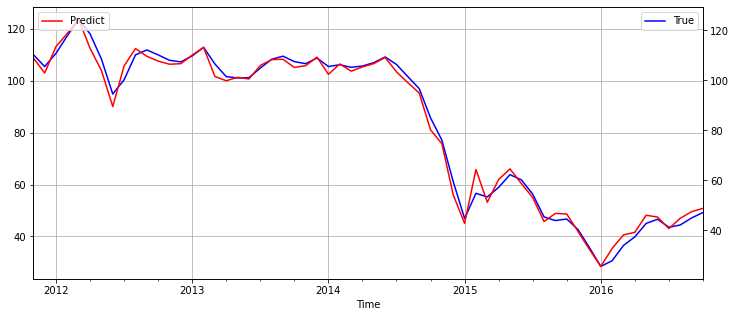

In [116]:
plt.figure(figsize=(12,5))
plt.xlabel('Data Volatility')

ax1 = data['price'].plot(color='blue', grid=True, label='True')
ax2 = data['arima_pred'].plot(color='red', grid=True, secondary_y=True, label='Predict')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()

In [109]:
np.sqrt(mean_squared_error(data['price'].values,pred))

2.806786185635812

# STATIONARITY OF DATASET

In [21]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data['price'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.946305
p-value                         0.772342
#Lags Used                      1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [22]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)
kpss_test(data['price'])

Results of KPSS Test:
Test Statistic            0.527531
p-value                   0.035466
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\YASH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


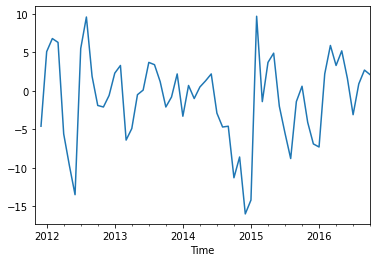

In [23]:
data['price_diff'] = data['price'] - data['price'].shift(1)
data['price_diff'].plot()

In [24]:
adf_test(data['price_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -4.826767
p-value                         0.000048
#Lags Used                      0.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

In [25]:
kpss_test(data['price_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.136479
p-value                   0.100000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\YASH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\YASH\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [117]:
values.variance.values

NameError: name 'values' is not defined

In [33]:
data['price'].values

array([110.1, 105.5, 110.6, 117.4, 123.7, 118.1, 108.4,  94.9, 100.4,
       110. , 111.9, 110. , 107.9, 107.3, 109.6, 112.9, 106.5, 101.6,
       101.1, 101.2, 104.9, 108.3, 109.5, 107.4, 106.6, 108.8, 105.5,
       106.2, 105.2, 105.7, 107. , 109.2, 106.3, 101.6,  97. ,  85.7,
        77.1,  61.1,  46.9,  56.6,  55.2,  58.9,  63.8,  61.8,  56.3,
        47.5,  46.1,  46.7,  42.6,  35.7,  28.4,  30.6,  36.5,  39.8,
        45. ,  46.6,  43.5,  44.4,  47.1,  49.2])

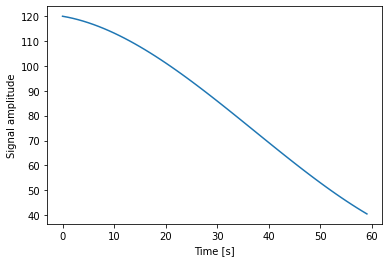

In [57]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

#np.linspace(0, 2, 2 * f_s, endpoint=False)
#x = np.sin(f * 2 * np.pi * t)
x=imfs['residue'].values
t=np.arange(0,60)
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

# EEMD TECHNIQUE

In [79]:
imfs=pd.read_excel('btp_imfs.xlsx')

In [80]:
imfs.head()

,Price,imf_1,imf_2,imf_3,imf_4,residue
0,110.1,-6.8186,2.8601,-1.5354,-4.3894,119.9833
1,105.5,-11.1586,3.2666,-2.3980,-3.8065,119.5965
2,110.6,-5.0246,2.9169,-3.2355,-3.1966,119.1398
3,117.4,3.4901,1.8914,-4.0309,-2.5658,118.6152
4,123.7,12.0193,0.3460,-4.7697,-1.9203,118.0247


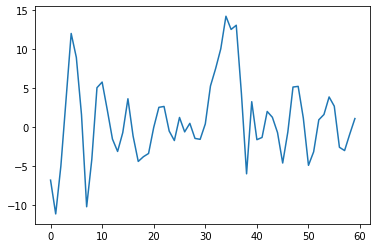

In [81]:
imfs['imf_1'].plot()

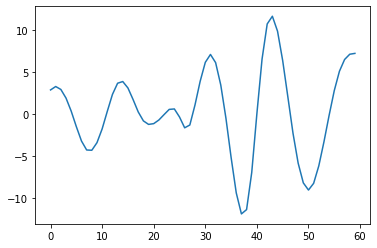

In [82]:
imfs['imf_2'].plot()

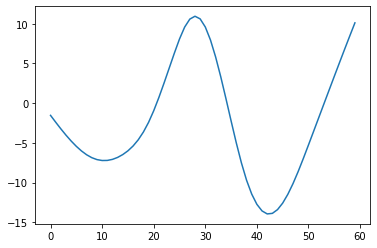

In [83]:
imfs['imf_3'].plot()

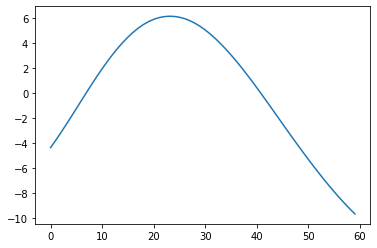

In [84]:
imfs['imf_4'].plot()

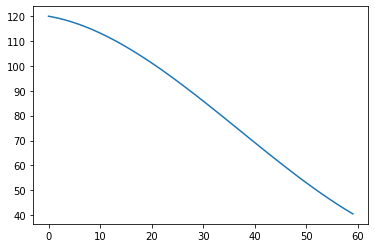

In [85]:
imfs['residue'].plot()

In [118]:
from keras.layers import InputLayer,Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [119]:
x=imfs[['imf_1','imf_2','imf_3','imf_4','residue']]

NameError: name 'imfs' is not defined

In [93]:
x.shape[1]

5

In [88]:
y=imfs['Price']

In [90]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.1,random_state=1)

In [94]:
model=Sequential()
model.add(InputLayer(input_shape=x.shape[1],))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='relu'))


In [95]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [103]:
model_history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=14,epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 36ms/step - loss: 36.6886 - val_loss: 59.3325
Epoch 2/10
4/4 [==============================] - 0s 9ms/step - loss: 35.6814 - val_loss: 57.8409
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 34.7241 - val_loss: 56.4955
Epoch 4/10
4/4 [==============================] - 0s 10ms/step - loss: 33.8543 - val_loss: 55.1452
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 32.9673 - val_loss: 53.8579
Epoch 6/10
4/4 [==============================] - 0s 12ms/step - loss: 32.1142 - val_loss: 52.4479
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 31.2213 - val_loss: 51.1222
Epoch 8/10
4/4 [==============================] - 0s 11ms/step - loss: 30.4529 - val_loss: 49.8081
Epoch 9/10
4/4 [==============================] - 0s 11ms/step - loss: 29.6598 - val_loss: 48.7359
Epoch 10/10
4/4 [==============================] - 0s 13ms/step - loss: 28.8364 - val_loss: 47.7003


In [110]:
results=model.predict(x)[:,0]

In [118]:
results=pd.DataFrame(results)

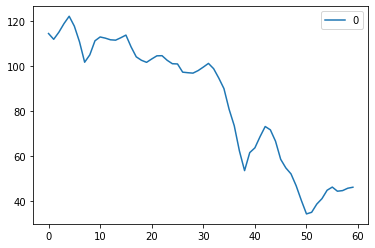

In [119]:
results.plot()

In [115]:
a=mean_squared_error(y,results)

In [116]:
np.sqrt(a)

5.501050549126307